In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## Data can be procured from:
## https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [250]:
df=pd.read_csv('D:/R programs/heart.csv')

In [251]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Exploratory Data analysis

In [252]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [253]:
df.shape

(299, 13)

In [254]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [255]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

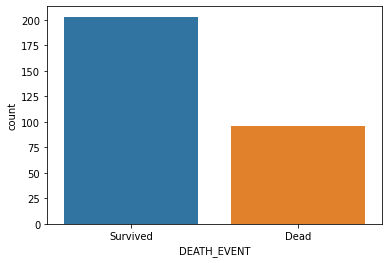

In [256]:
cp=sns.countplot(df['DEATH_EVENT'])
cp.set_xticklabels(['Survived','Dead'])
plt.show()

In [257]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [258]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

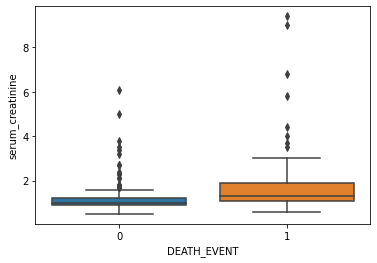

In [259]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=df) #Levels of serum_creatinine wrt Death

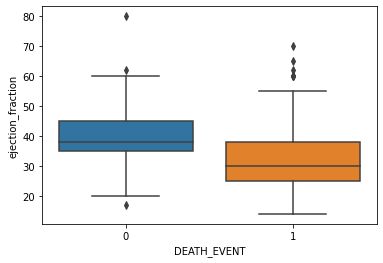

In [260]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df) #Percent of ejection_fraction wrt Death

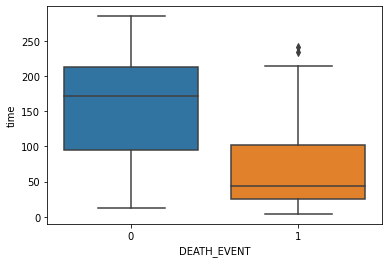

In [261]:
sns.boxplot(x='DEATH_EVENT',y='time',data=df) #Follow up period wrt Death

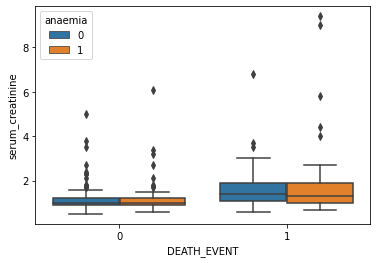

In [262]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',hue='anaemia',data=df) #Levels of serum creatinine wrt anaemia and death

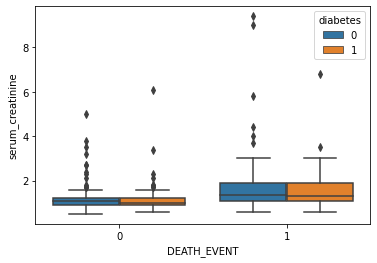

In [263]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',hue='diabetes',data=df) #Levels of serum creatinine wrt diabetes and death

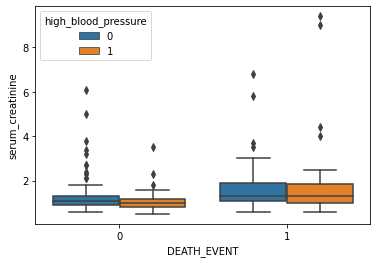

In [264]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',hue='high_blood_pressure',data=df) #Levels of serum creatinine wrt high bp and death

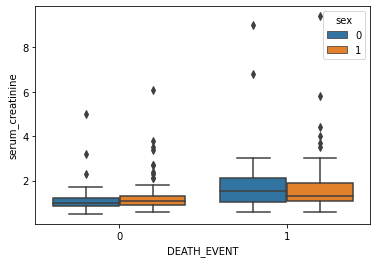

In [265]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',hue='sex',data=df) #Levels of serum creatine wrt sex and death

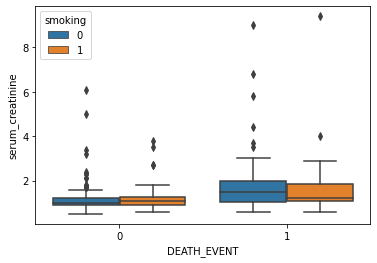

In [266]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',hue='smoking',data=df) #Levels of serum creatinine wrt smoking and death 

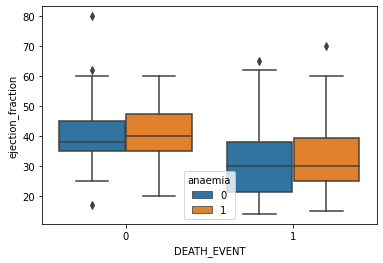

In [267]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',hue='anaemia',data=df) #Ejection fraction wrt anaemia and death

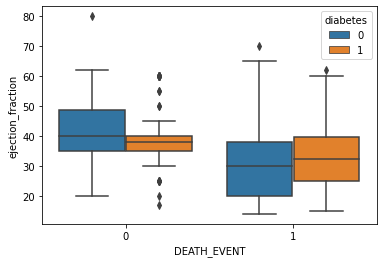

In [268]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',hue='diabetes',data=df) #Ejection fraction wrt diabetes and death

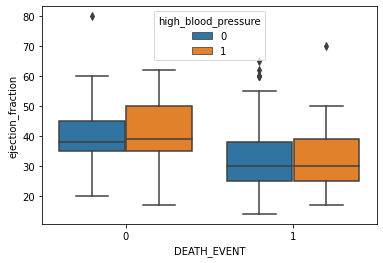

In [269]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',hue='high_blood_pressure',data=df) #Ejection fraction wrt high bp and death

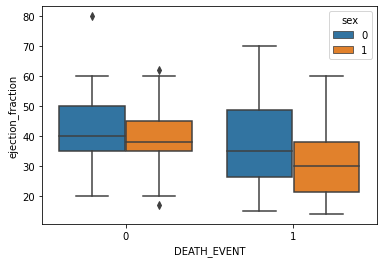

In [270]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',hue='sex',data=df) #Ejection fraction wrt sex and death

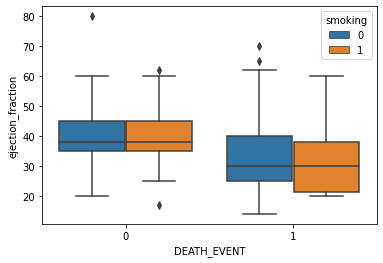

In [271]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',hue='smoking',data=df) #Ejection fraction wrt smoking and death

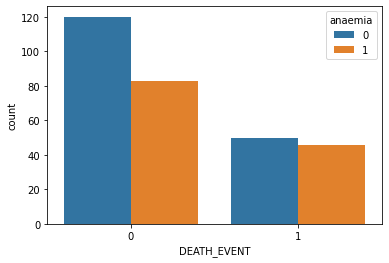

In [272]:
sns.countplot(x='DEATH_EVENT',hue='anaemia',data=df) #Count of individuals with anaemia wrt death

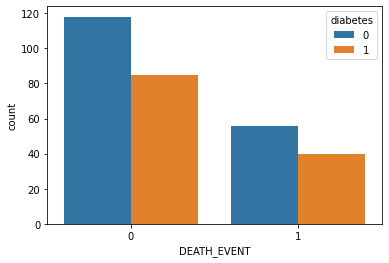

In [273]:
sns.countplot(x='DEATH_EVENT',hue='diabetes',data=df) #Count of individuals with diabetes wrt death

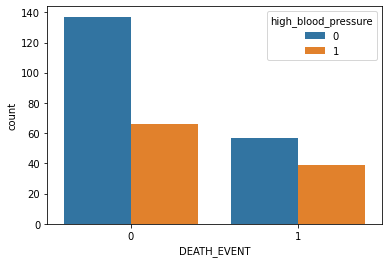

In [274]:
sns.countplot(x='DEATH_EVENT',hue='high_blood_pressure',data=df) #Count of individuals with high bp wrt death

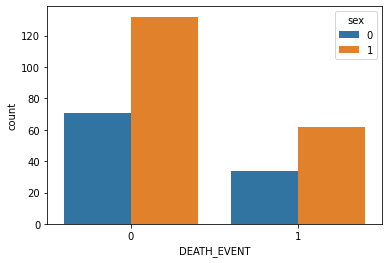

In [275]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=df) #Count of individual sexes wrt death

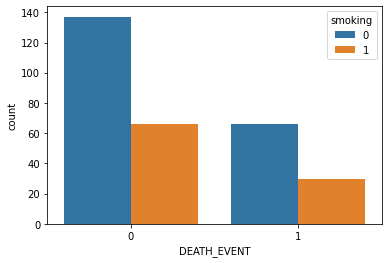

In [276]:
sns.countplot(x='DEATH_EVENT',hue='smoking',data=df) #Count of smokers wrt death

In [277]:
def age_class(df):
    if df<=60:
        return 'Old'
    else:
        return 'Very Old'

In [278]:
df['age']=df['age'].apply(age_class)

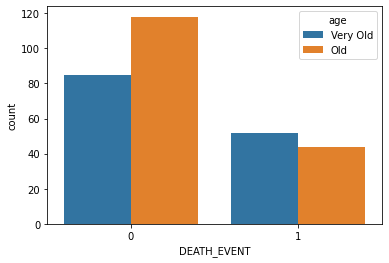

In [279]:
sns.countplot(x='DEATH_EVENT',hue='age',data=df) #Count of age of individuals wrt death

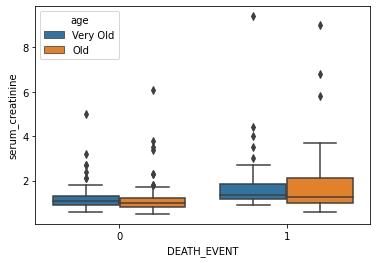

In [280]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',hue='age',data=df) #Levels of serum creatinine wrt age and death

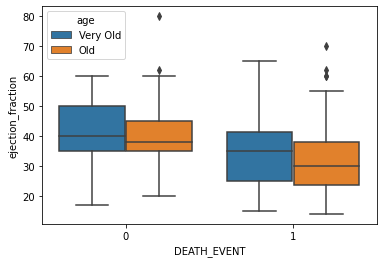

In [281]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',hue='age',data=df) #Percent of ejection fraction wrt age and death

## Feature Scaling

In [282]:
sc=MinMaxScaler()
df['creatinine_phosphokinase']=sc.fit_transform(df[['creatinine_phosphokinase']])
df['ejection_fraction']=sc.fit_transform(df[['ejection_fraction']])
df['platelets']=sc.fit_transform(df[['platelets']])
df['serum_sodium']=sc.fit_transform(df[['serum_sodium']])
df['time']=sc.fit_transform(df[['time']])

label=LabelEncoder()
df['age']=label.fit_transform(df['age'])


In [283]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,0,0.071319,0,0.090909,1,0.290823,1.9,0.485714,1,0,0.000000,1
1,0,0,1.000000,0,0.363636,0,0.288833,1.1,0.657143,1,0,0.007117,1
2,1,0,0.015693,0,0.090909,0,0.165960,1.3,0.457143,1,1,0.010676,1
3,0,1,0.011227,0,0.090909,0,0.224148,1.9,0.685714,1,0,0.010676,1
4,1,1,0.017479,1,0.090909,0,0.365984,2.7,0.085714,0,0,0.014235,1


In [284]:
x,y=df.drop(['DEATH_EVENT'],axis=1),df['DEATH_EVENT']
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,0,0.071319,0,0.090909,1,0.290823,1.9,0.485714,1,0,0.000000
1,0,0,1.000000,0,0.363636,0,0.288833,1.1,0.657143,1,0,0.007117
2,1,0,0.015693,0,0.090909,0,0.165960,1.3,0.457143,1,1,0.010676
3,0,1,0.011227,0,0.090909,0,0.224148,1.9,0.685714,1,0,0.010676
4,1,1,0.017479,1,0.090909,0,0.365984,2.7,0.085714,0,0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0.004848,1,0.363636,1,0.157474,1.1,0.857143,1,1,0.946619
295,0,0,0.229268,0,0.363636,0,0.296884,1.2,0.742857,0,0,0.950178
296,0,0,0.259888,1,0.696970,0,0.869075,0.8,0.714286,0,0,0.975089
297,0,0,0.304925,0,0.363636,0,0.139290,1.4,0.771429,1,1,0.982206


In [285]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

## Train-Test split

In [286]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [287]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
print('Accuracy score is {:.2f}'.format(accuracy_score(y_test,log_pred)))
print('Precision score is {:.2f}'.format(precision_score(y_test,log_pred)))

Accuracy score is 0.82
Precision score is 0.82


In [288]:
imp=pd.DataFrame({'Variable':list(x_train.columns),'Feat_Imp':rf_m.feature_importances_}).sort_values('Feat_Imp',ascending=False)
imp

,Variable,Feat_Imp
11,time,0.319382
7,serum_creatinine,0.158402
4,ejection_fraction,0.129048
0,age,0.102676
2,creatinine_phosphokinase,0.079318
6,platelets,0.077245
8,serum_sodium,0.070473
1,anaemia,0.015128
9,sex,0.014417
3,diabetes,0.012262


## Imp variables are time,serum_creatinine,ejection_fraction and age
## Creating models on selected variables

In [289]:
df_sel=df[['time','serum_creatinine','ejection_fraction','age','DEATH_EVENT']]
df_sel.head()

,time,serum_creatinine,ejection_fraction,age,DEATH_EVENT
0,0.000000,1.9,0.090909,1,1
1,0.007117,1.1,0.363636,0,1
2,0.010676,1.3,0.090909,1,1
3,0.010676,1.9,0.090909,0,1
4,0.014235,2.7,0.090909,1,1


In [290]:
x,y=df_sel.drop(['DEATH_EVENT'],axis=1),df_sel['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
print('Accuracy score is {:.2f}'.format(accuracy_score(y_test,log_pred)))
print('Precision score is {:.2f}'.format(precision_score(y_test,log_pred)))

Accuracy score is 0.82
Precision score is 0.79


In [291]:
x,y=df_sel.drop(['DEATH_EVENT'],axis=1),df_sel['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
print('Accuracy score is {:.2f}'.format(accuracy_score(y_test,log_pred)))
print('Precision score is {:.2f}'.format(precision_score(y_test,log_pred)))

Accuracy score is 0.88
Precision score is 0.91


In [292]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('Accuracy score is {:.2f}'.format(accuracy_score(y_test,rf_pred)))
print('Precision score is {:.2f}'.format(precision_score(y_test,rf_pred)))

Accuracy score is 0.86
Precision score is 0.81


In [293]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg_pred=rf.predict(x_test)
print('Accuracy score is {:.2f}'.format(accuracy_score(y_test,xg_pred)))
print('Precision score is {:.2f}'.format(precision_score(y_test,xg_pred)))

[17:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is 0.86
Precision score is 0.81


C:\Users\B SRIDHAR\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [294]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=rf.predict(x_test)
print('Accuracy score is {:.2f}'.format(accuracy_score(y_test,knn_pred)))
print('Precision score is {:.2f}'.format(precision_score(y_test,knn_pred)))

Accuracy score is 0.86
Precision score is 0.81
